In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

dir_data="../home-credit-default-risk"
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
#the file encode problem on macOS
app_train = pd.read_csv(f_app)

Path of read in data: ../home-credit-default-risk/application_train.csv


In [2]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


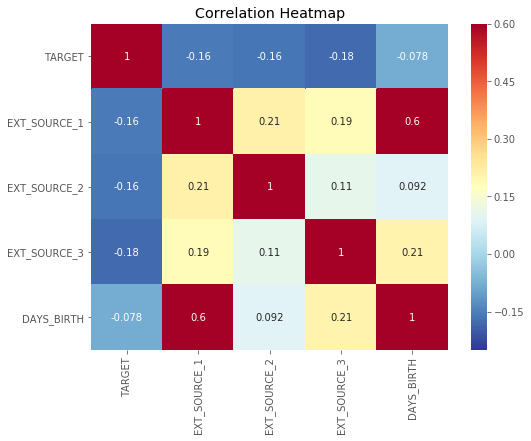

In [3]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


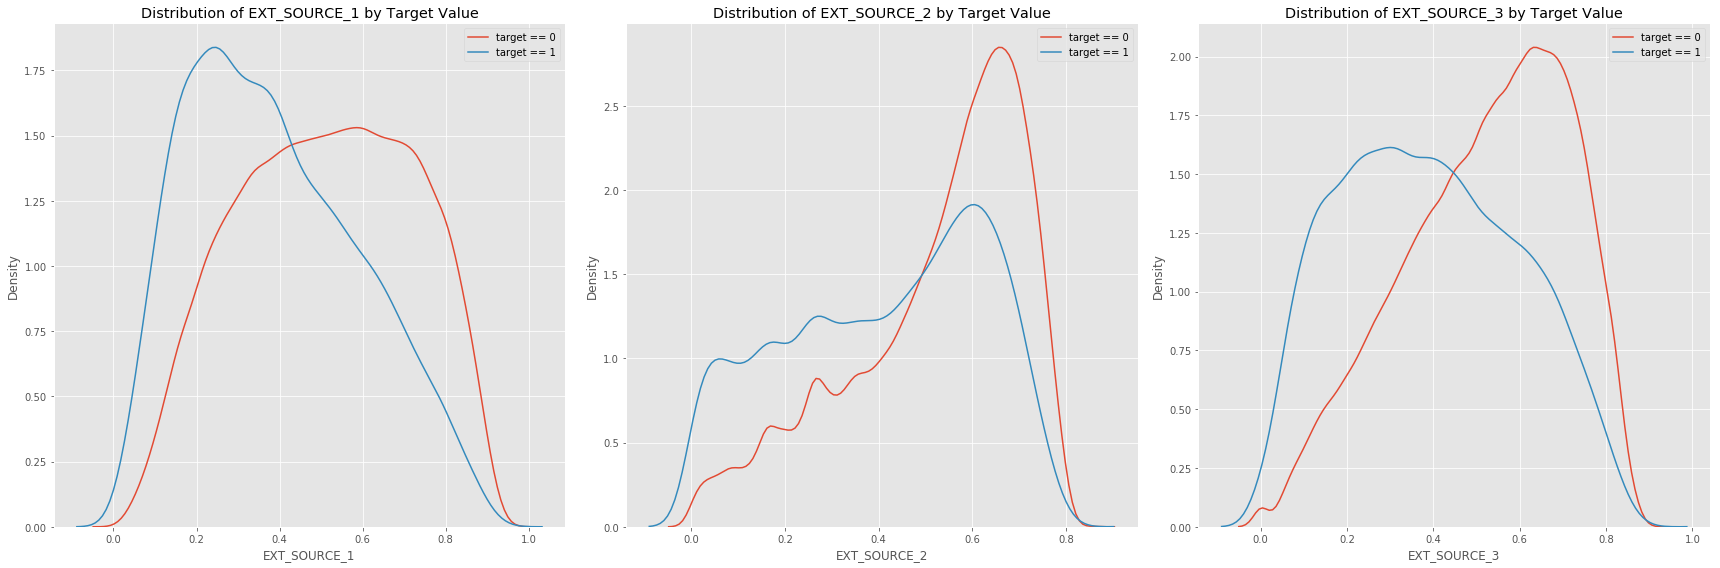

In [4]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同
plt.figure(figsize = (24, 8))

# 依不同 EXT_SOURCE 逐項繪製 KDE 圖形
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # 做 subplot
    plt.subplot(1, 3, i + 1)
    
    # KDE 圖形
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # 加上各式圖形標籤
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [5]:
# 轉成以年記齡後，將以日記齡丟掉
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
plot_data.drop(['DAYS_BIRTH'],axis = 1, inplace=True)

# 定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

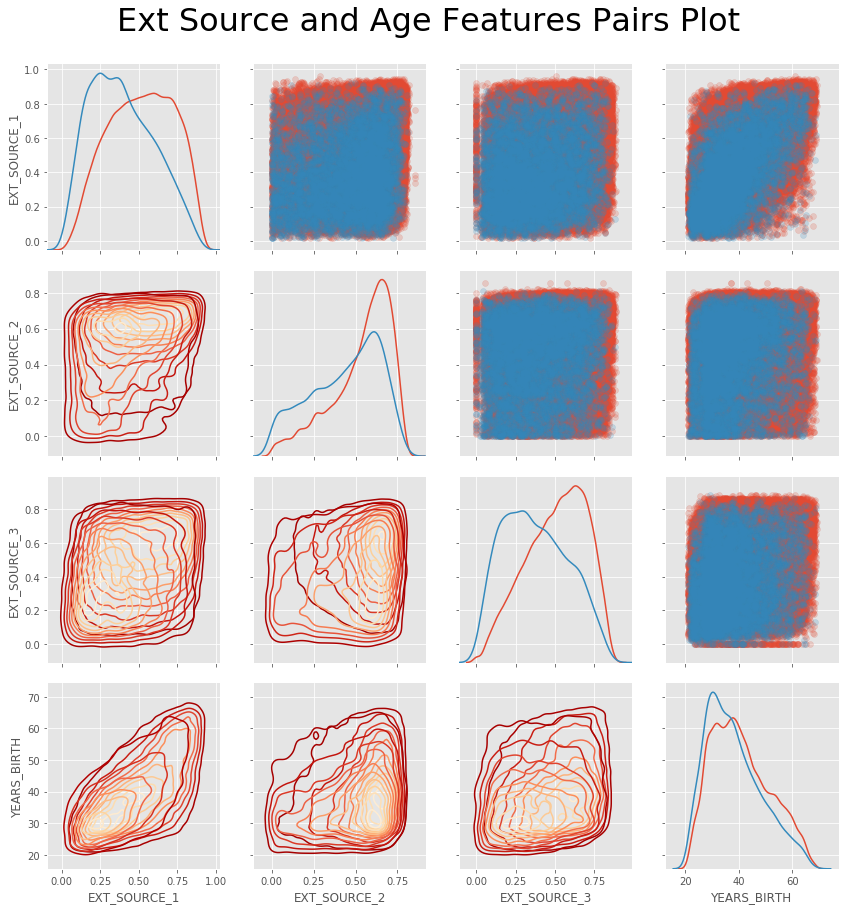

In [6]:
N_sample = 100000
# 把 NaN 數值刪去, 並限制資料上限為 100000 : 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

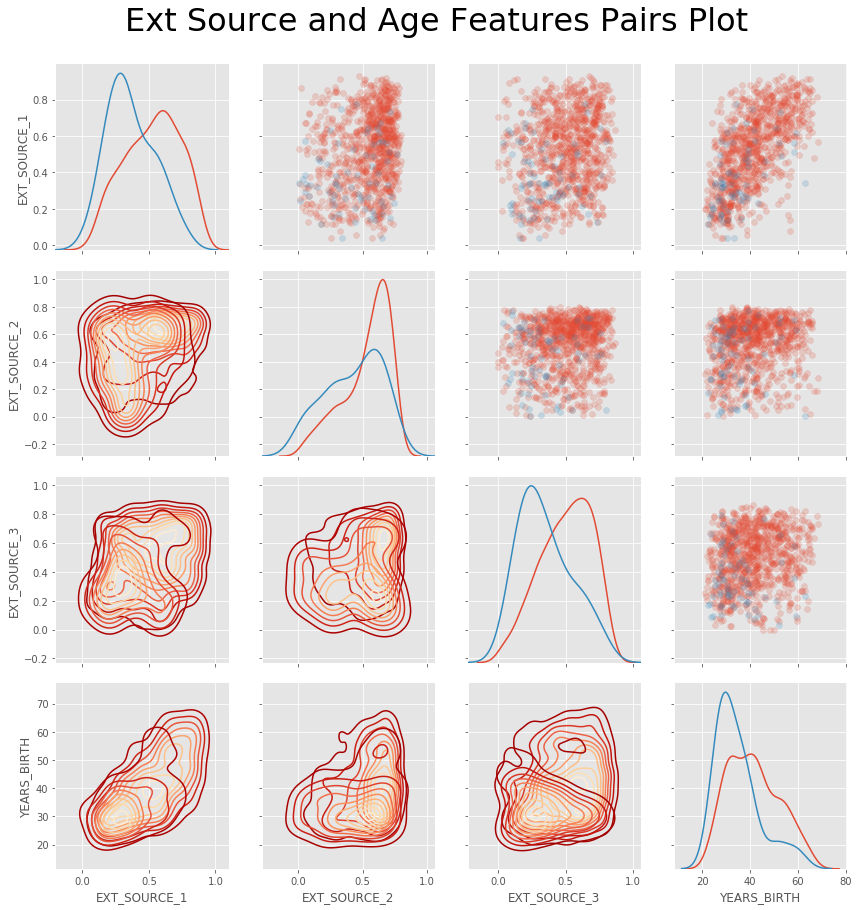

In [7]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

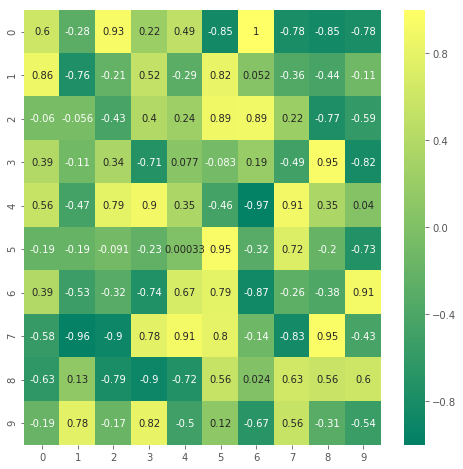

In [12]:
 #Q1 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
  
matrix1 = np.random.uniform(low = -1.0, high = 1.0, size = (10,10))
plt.figure(figsize=(8,8))
sns.heatmap(matrix1,cmap = plt.cm.summer , annot = True, vmin = -1.0, vmax = 1.0)
plt.show()

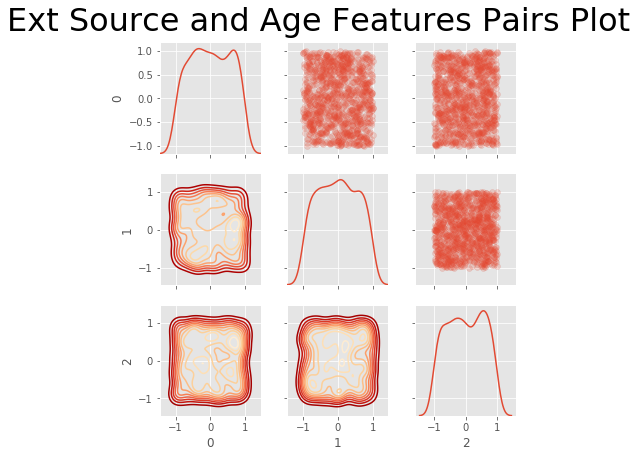

In [28]:
#Q2 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
matrix2 = np.random.uniform(low = -1.0, high = 1.0, size = (1000,3))

df2 = pd.DataFrame(matrix2)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = df2,size = 2,diag_sharey = False)
# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

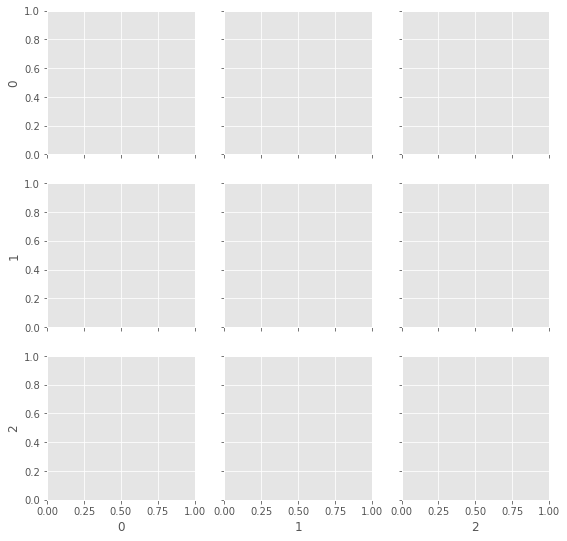

In [25]:
#Q3請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
matrix2 = np.random.uniform( size = (1000,3))

df2 = pd.DataFrame(matrix2)
plot_data = plot_data.dropna().sample(3000,replace=True)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = matrix2, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()